In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

'''
Are the plants progressing?
What are the main growth obstacles?
Is there a geographic factor in growth?
Is there a correlation between health and growth?
Which plants are dying the most?
Which plants are dying the least?
'''


'\nAre the plants progressing?\nWhat are the main growth obstacles?\nIs there a geographic factor in growth?\nIs there a correlation between health and growth?\nWhich plants are dying the most?\nWhich plants are dying the least?\n'

In [ ]:
##SIEMBRAS
    #Vedas 500 Kv fecha de siembra 9-20 abril 2019

    #Aprovechamiento forestal - Encenillo 15-31 julio 2019

    #Vedas 230 Kv 18-30 mayo 2020

    #Banqueo 14-26 agosto 2020, bosque y vegetación secundaria,  3-11 mayo escenario ulex

    #Santa Rosa 26-30 junio y 1-15 julio 2020

    #Bojacá 15 junio - 8 noviembre 2020


In [ ]:
##Ignore this cell for now
#Turn each working directory into a variable
SAPN_0762 = str(r"Original Data\Sistematizacion Monitoreo 5_SAPN-Res0762_Ajustado.xlsx")
SAPN_1166 = str(r"Original Data\Sistematizacion Monitoreo 5_SAPN-Res1166_Ajustado.xlsx")
vedas500_675 = str(r"Original Data\Sistematización Monitoreo 5_Veda 500-Res675.xlsx")
vedas500_766 = str(r"Original Data\Sistematización Monitoreo 5_Veda 500-Res766.xlsx")
AF = str(r"Original Data\Sistematización_AF_Monitoreo 6.xlsx")
Sibaté = str(r"Original Data\Sistematizacion_Monitoreo 4-SAPR-Sibaté.xlsx")
Esmeralda = str(r"Original Data\Sistematización_SAPR-Esmeralda_Monitoreo 3.xlsx")
Peñas = str(r"Original Data\Sistematización_SAPR-Peñas_Monitoreo 2.xlsx")
Vedas230 = str(r"Original Data\Sistematización_Veda230_Monitoreo 2_AjustadoFeb2021.xlsx")

#Import each file into a dataframe
df_SAPN_0762=pd.read_excel(SAPN_0762)
df_SAPN_1166=pd.read_excel(SAPN_1166)
df_vedas500_675=pd.read_excel(vedas500_675)
df_vedas500_766=pd.read_excel(vedas500_766)
df_AF=pd.read_excel(AF)
df_Sibaté=pd.read_excel(Sibaté)
df_Esmeralda=pd.read_excel(Esmeralda)
df_Peñas=pd.read_excel(Peñas)
df_Vedas230=pd.read_excel(Vedas230)

#create tuples of relevant information I want to add.
totaldata = (SAPN_0762, SAPN_1166, vedas500_675, vedas500_766, AF, Sibaté, Esmeralda, Peñas, Vedas230)
df_vars = (df_SAPN_0762, df_SAPN_1166, df_vedas500_675, df_vedas500_766, df_AF, df_Sibaté, df_Esmeralda, df_Peñas, df_Vedas230)
predios = ('Banqueo', 'Banqueo', 'Peñas', 'Peñas', 'Encenillo', 'Sibaté', 'Esmeralda', 'Peñas', 'Esmeralda')



In [2]:
Sibaté = str(r"Original Data\Sistematizacion_Monitoreo 4-SAPR-Sibaté.xlsx")
df_Sibaté=pd.read_excel(Sibaté)

In [11]:
grab = df_Sibaté[df_Sibaté['Escenario']=='Recarga hídrica']
#grab = grab[grab['Estrategia']=='Fajas ampliación']
#grab = grab[grab['Tipo']==2]
grab['No_Mod'].unique()

array([ 2,  4,  6,  8,  9, 10, 12, 13, 14], dtype=int64)

In [4]:
df_Sibaté['Escenario'].unique()

array(['Pastos limpios', 'Recarga hídrica', 'Pajonal-Frailejonal'],
      dtype=object)

In [6]:
df_Sibaté.columns

Index(['Fecha', 'Even_mon', 'ID', 'Escenario', 'Estrategia', 'Tipo', 'No_Mod',
       'No_Ind', 'No_Placa', 'Especie', 'Biotipo', 'Sup_Ind', 'Est_Fit_Ind',
       'Col', 'Vig_Baj', 'Her', 'Pat', 'Com_H-E', 'Dan_Mec', 'Aneg', 'PNE',
       'Alt_Ind', 'DAB1_Ind', 'DAB2_Ind', 'DAB_prom', '%_Cober', 'Diam_1_Ind',
       'Diam_2_Ind', 'Area_cop_ind', 'No_Hojas', 'Observaciones'],
      dtype='object')

In [2]:
Esmeralda = str(r"Original Data\Sistematización_SAPR-Esmeralda_Monitoreo 3.xlsx")
Peñas = str(r"Original Data\Sistematización_SAPR-Peñas_Monitoreo 3.xlsx")

df_Esmeralda=pd.read_excel(Esmeralda)
df_Peñas=pd.read_excel(Peñas)



In [ ]:
print(df_Esmeralda.shape)
print(df_Peñas.shape)

In [3]:
df_SAPR=pd.concat([df_Esmeralda, df_Peñas])

In [ ]:
df_SAPR.head

In [ ]:
for col in df_SAPR.columns:
    print(col)

In [ ]:
df_SAPR['Sup_Ind'].head

In [4]:
#get unique species names
species = df_SAPR['Especie'].unique().tolist()

In [6]:
species.sort()


In [7]:
#replace duplicate/incorrect values for aggregate dataset
df_SAPR['Especie'].replace(to_replace='BAccharis latifolia',value='Baccharis latifolia', inplace=True)
df_SAPR['Especie'].replace(to_replace='baccharis latifolia',value='Baccharis latifolia', inplace=True)
df_SAPR['Especie'].replace(to_replace='Cedrela Montana',value='Cedrela montana', inplace=True)
df_SAPR['Especie'].replace(to_replace='Myrcianthes leucoxyla',value='Mycianthes leucoxyla', inplace=True)
df_SAPR['Especie'].replace(to_replace='Solanum oblongifolium ',value='Solanum oblongifolium', inplace=True)
df_SAPR['Especie'].replace(to_replace='lupinus interruptus',value='Lupinus interruptus', inplace=True)
#do the same for original datasets
df_Esmeralda['Especie'].replace(to_replace='BAccharis latifolia',value='Baccharis latifolia', inplace=True)
df_Esmeralda['Especie'].replace(to_replace='baccharis latifolia',value='Baccharis latifolia', inplace=True)
df_Esmeralda['Especie'].replace(to_replace='Cedrela Montana',value='Cedrela montana', inplace=True)
df_Esmeralda['Especie'].replace(to_replace='Myrcianthes leucoxyla',value='Mycianthes leucoxyla', inplace=True)
df_Esmeralda['Especie'].replace(to_replace='Solanum oblongifolium ',value='Solanum oblongifolium', inplace=True)
df_Esmeralda['Especie'].replace(to_replace='lupinus interruptus',value='Lupinus interruptus', inplace=True)

df_Peñas['Especie'].replace(to_replace='BAccharis latifolia',value='Baccharis latifolia', inplace=True)
df_Peñas['Especie'].replace(to_replace='baccharis latifolia',value='Baccharis latifolia', inplace=True)
df_Peñas['Especie'].replace(to_replace='Cedrela Montana',value='Cedrela montana', inplace=True)
df_Peñas['Especie'].replace(to_replace='Myrcianthes leucoxyla',value='Mycianthes leucoxyla', inplace=True)
df_Peñas['Especie'].replace(to_replace='Solanum oblongifolium ',value='Solanum oblongifolium', inplace=True)
df_Peñas['Especie'].replace(to_replace='lupinus interruptus',value='Lupinus interruptus', inplace=True)

In [8]:
species = df_SAPR['Especie'].unique().tolist()
species.sort()
species

['Ageratina ampla',
 'Ageratina boyacensis',
 'Aniba panurensis',
 'Axinaea sp.',
 'Baccharis latifolia',
 'Bocconia frutescens',
 'Brunellia comocladifolia',
 'Cedrela montana',
 'Ceroxylon alpinum',
 'Cestrum mutisii',
 'Chamaedorea linearis',
 'Clusia multiflora',
 'Cordia cylindrostachya',
 'Croton magdalenensis',
 'Escallonia paniculata',
 'Guarea kunthiana',
 'Hedyosmum crenatum',
 'Helecho',
 'Juglans neotropica',
 'Lepechinia salviifolia',
 'Lippia hirsuta',
 'Lupinus interruptus',
 'Miconia sp.',
 'Morella pubescens',
 'Mycianthes leucoxyla',
 'Myrsine coriacea',
 'Oreopanax incisus',
 'Palicourea angustifolia',
 'Piper nubigenum',
 'Quercus humboldtii',
 'Retrophyllum rospigliosii',
 'Rhamnus goudotiana',
 'Smallanthus pyramidalis',
 'Solanum oblongifolium',
 'Tibouchina',
 'Verbesina crassiramea',
 'Verbesina nudipes',
 'Viburnum tinoides',
 'Weinmannia cundinamarcensis']

In [9]:
#Save the relatively clean data to new excel files.
aggwriter = pd.ExcelWriter('SAPR3.xlsx', engine='openpyxl')
esmwriter = pd.ExcelWriter('Esmeralda.xlsx', engine='openpyxl')
penwriter = pd.ExcelWriter('Peñas.xlsx', engine='openpyxl')
df_SAPR.to_excel(aggwriter, index=False, engine='openpyxl')
df_Esmeralda.to_excel(esmwriter, index=False, engine='openpyxl')
df_Peñas.to_excel(penwriter, index=False, engine='openpyxl')
aggwriter.save()
esmwriter.save()
penwriter.save()

In [14]:
#make some seaborn defaults
base_color = sns.color_palette()[0]

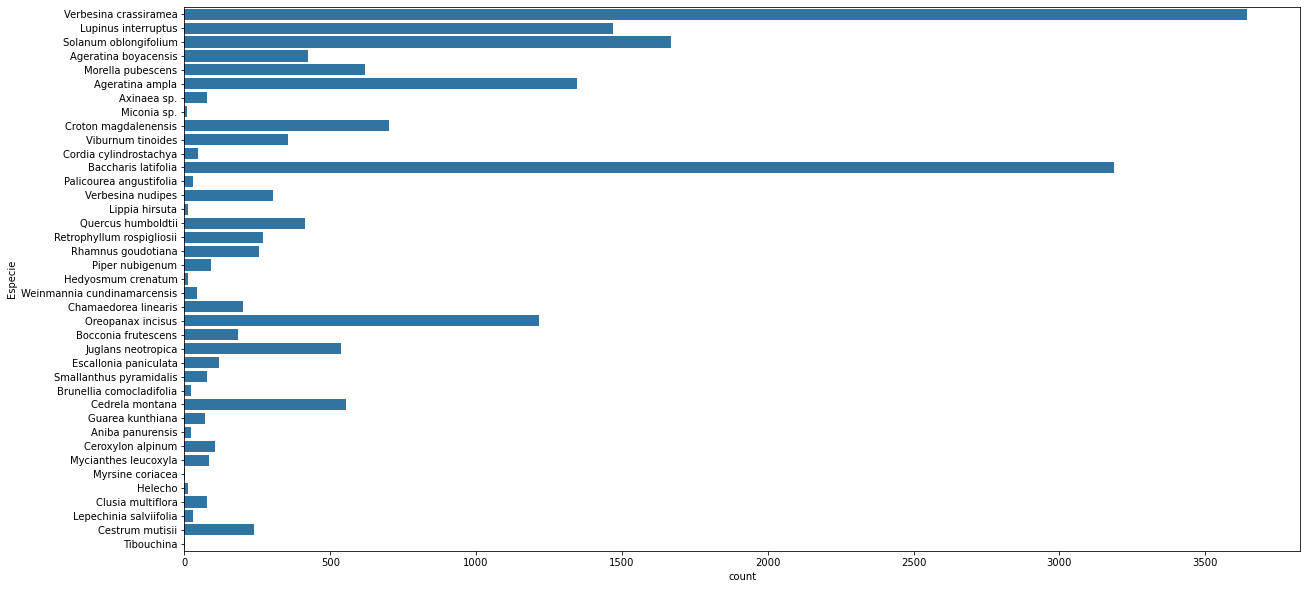

In [15]:
#number of measurements per species in the dataset
plt.figure(figsize=(20,10))
sns.countplot(data=df_SAPR, y='Especie', color=base_color);

In [16]:
# separate living and dead plants
# Since the unplanted were marked as "N/A" in T1 and T2, this conveniently excludes those.
living = df_SAPR[df_SAPR['Sup_Ind']=="SI"]
dead = df_SAPR[df_SAPR['Sup_Ind']=="NO"]
living_grouped = living.groupby(by="Especie").count()
dead_grouped = dead.groupby(by="Especie").count()
living_grouped = living_grouped['ID']
dead_grouped = dead_grouped['ID']
Ratios = dead_grouped/living_grouped
Ratios = Ratios.transpose()

In [48]:
#Let's also separate by each time period, regardless of living or dead
t1 = df_SAPR[df_SAPR['Even_mon']=='T1']
t2 = df_SAPR[df_SAPR['Even_mon']=='T2']
t3 = df_SAPR[df_SAPR['Even_mon']=='T3']

In [ ]:
#Total number of dead plants by species. 
plt.figure(figsize=(20,10))
sns.countplot(data=dead, y="Especie", order=species, color=base_color);

In [ ]:
#Total number of living plants by species. Note that some species have died disproportionately to others.
plt.figure(figsize=(20,10))
sns.countplot(data=living, y='Especie', order=species, color=base_color);

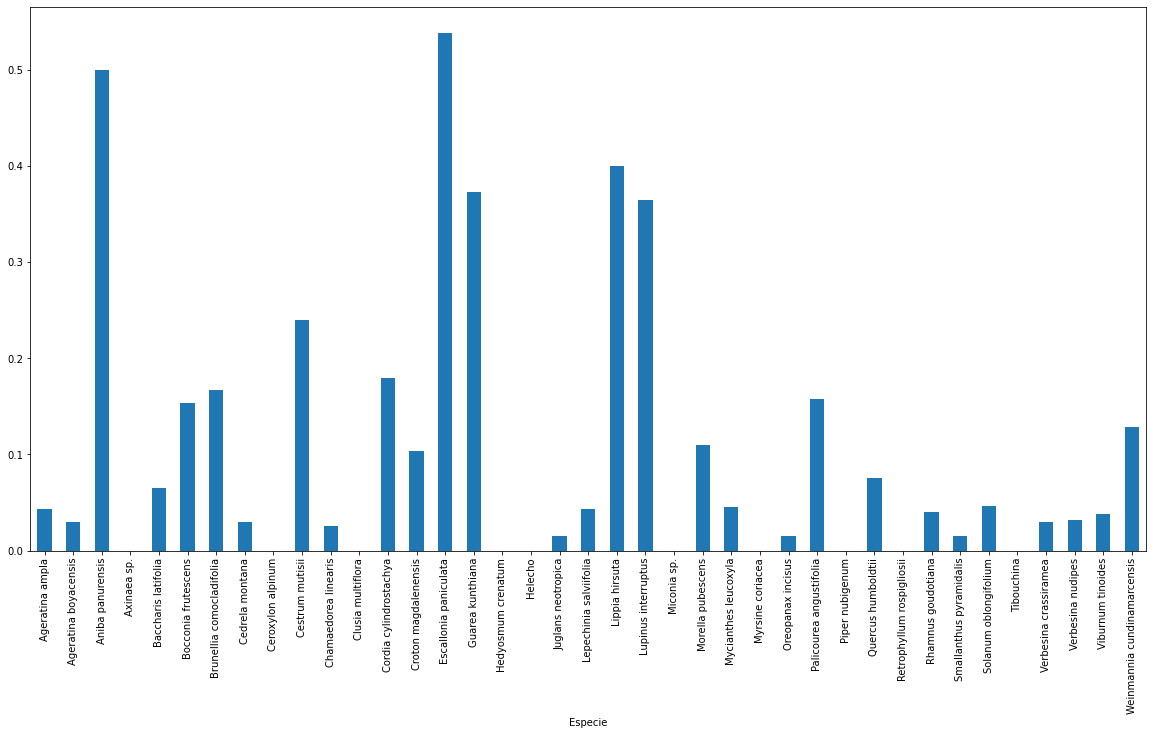

In [19]:
#plot the Ratio of dead to living plants per species
#The most successful species have the lowest ratios.
#Not 100% accurate, plant replacement means that most ratios are artificially lowered.
#Additionally, if there's a dead plant that wasn't replaced from T2 to T3, it gets counted twice.
#Plants that were never planted in the first place (like some in peñas) also get counted.
plt.figure(figsize=(20,10))
Ratios.plot(kind='bar');

In [43]:
#let's split the dataset into the three collection periods.
living1=living[living['Even_mon']=='T1']
living2=living[living['Even_mon']=='T2']
living3=living[living['Even_mon']=='T3']
dead1=dead[dead['Even_mon']=='T1']
dead2=dead[dead['Even_mon']=='T2']
dead3=dead[dead['Even_mon']=='T3']
#To make T3 the same format, we have to remove the unplanted species.
unplanted3 = dead3[dead3['PNE']=='SI']
dead3 = dead3[dead3['PNE']!='SI']
#Let's grab the unplanted data for T1 and T1 while we're at it
unplanted = df_SAPR[df_SAPR['Observaciones']=='No sembrado']
unplanted1 = unplanted[unplanted['Even_mon']=='T1']
unplanted2 = unplanted[unplanted['Even_mon']=='T2']
unplanted = pd.concat([unplanted1,unplanted2,unplanted3])

In [40]:
#repeat the steps we used above to get ratios, but for individual timeframes
living1_grouped = living1.groupby(by="Especie").count()
living1_grouped = living1_grouped['ID']
dead1_grouped = dead1.groupby(by="Especie").count()
dead1_grouped = dead1_grouped['ID']
dlratio1 = dead1_grouped/living1_grouped
dlratio1 = dlratio1.transpose()

living2_grouped = living2.groupby(by="Especie").count()
living2_grouped = living2_grouped['ID']
dead2_grouped = dead2.groupby(by="Especie").count()
dead2_grouped = dead2_grouped['ID']
dlratio2 = dead2_grouped/living1_grouped
dlratio2 = dlratio2.transpose()

living3_grouped = living3.groupby(by="Especie").count()
living3_grouped = living3_grouped['ID']
dead3_grouped = dead3.groupby(by="Especie").count()
dead3_grouped = dead3_grouped['ID']
dlratio3 = dead3_grouped/living1_grouped
dlratio3 = dlratio3.transpose()

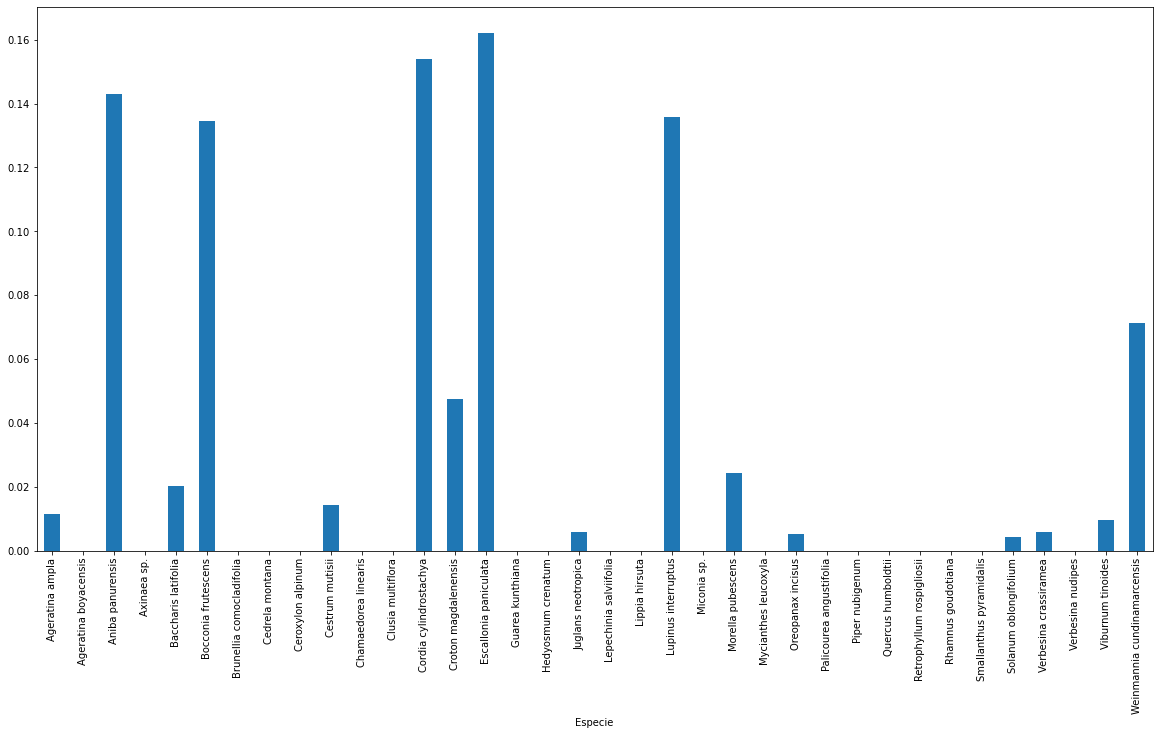

In [22]:
#Plot that bizz
plt.figure(figsize=(20,10))
dlratio1.plot(kind='bar');

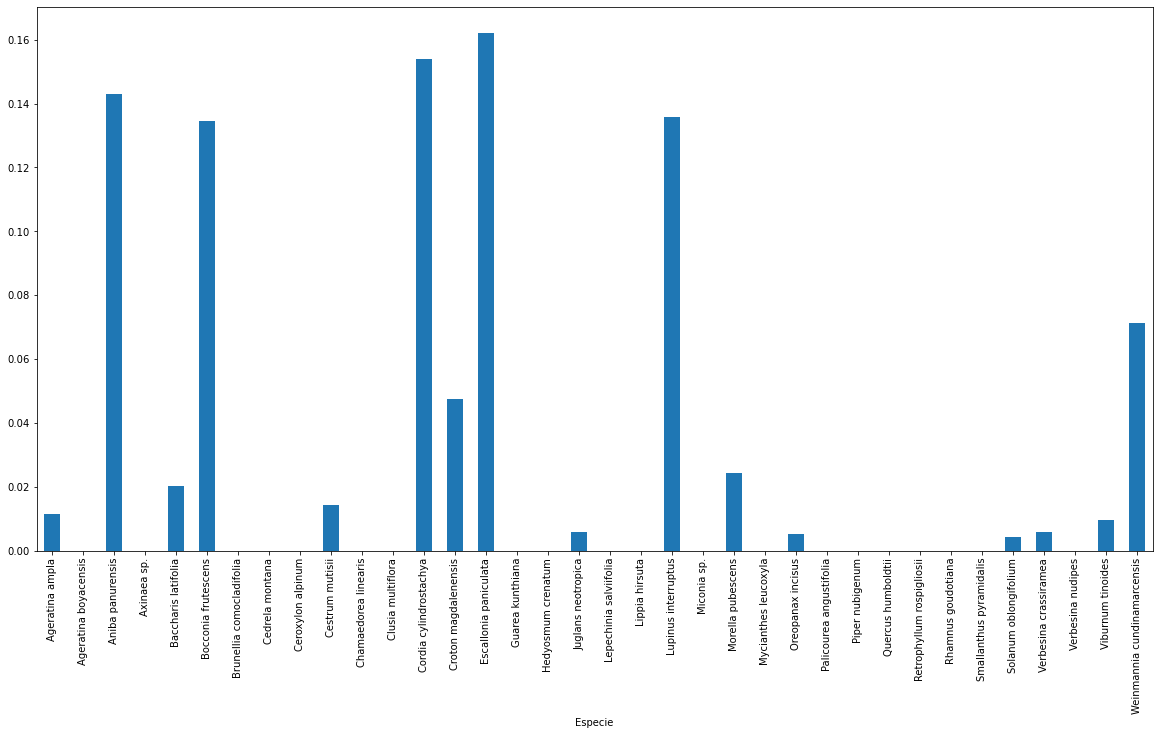

In [34]:
plt.figure(figsize=(20,10))
dlratio2.plot(kind='bar');

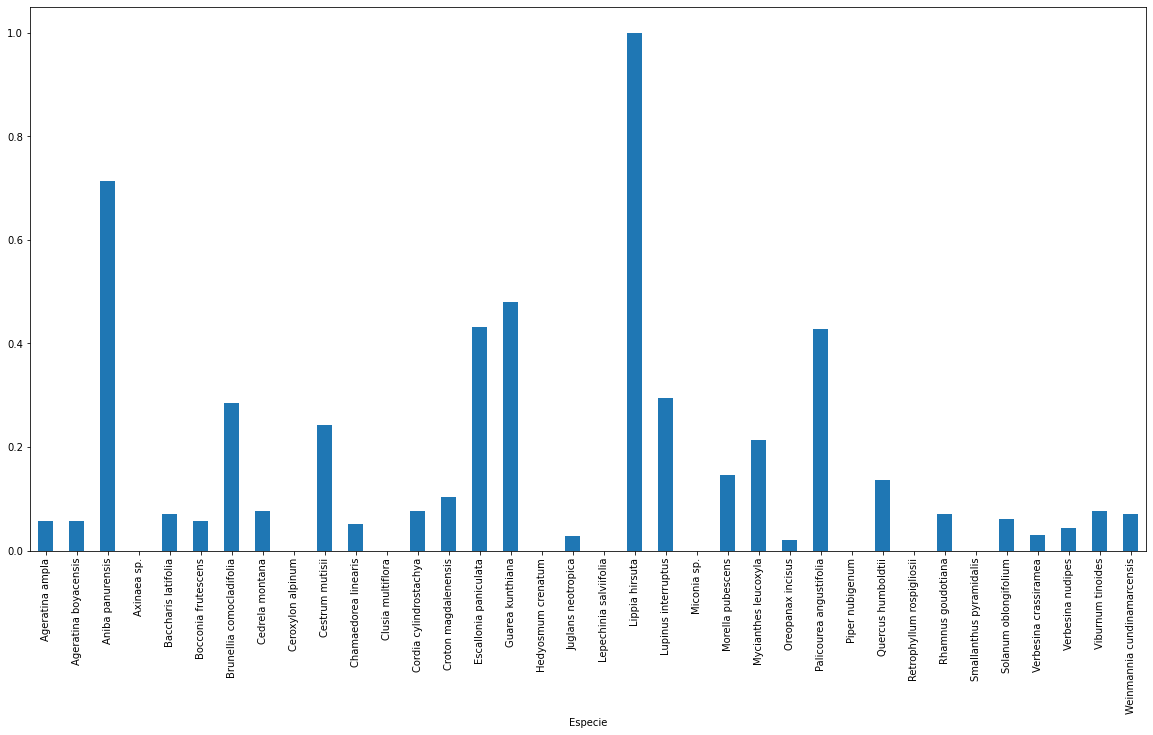

In [42]:
plt.figure(figsize=(20,10))
dlratio3.plot(kind='bar');

In [41]:
#Conclusions? Mortality was virtually the same in T1 v T2, with roughly 6 species not appearing suitable for this particular area
#T3 shows a much more organic spread, but some plants clearly do much worse than others.
#Lippia, Aniba, Palicourea, Guarea, Escallonia, all have very high mortality rates.
#Acceptable mortality in this case is 0.1, or 10%. Could we potentially solve our mortality issues
#by changing what species we plant?

In [47]:
#What's the total mortality ratio for the whole thing?
total_plants = df_SAPR.shape[0]
df_total_dead = pd.concat([dead1, dead2, dead3])
total_dead = df_total_dead.shape[0]
total_dl_ratio = total_dead/total_plants

print(total_plants)
print(total_dead)
print(total_dl_ratio)

18531
1134
0.0611947547353084


In [50]:
#So it seems like the total mortality ratio is actually fine. What about for each time period?
tp1 = t1.shape[0]
tp2 = t2.shape[0]
tp3 = t3.shape[0]
td1 = dead1.shape[0]
td2 = dead2.shape[0]
td3 = dead3.shape[0]
tr1 = td1/tp1
tr2 = td2/tp2
tr3 = td3/tp3
print(tr1)
print(tr2)
print(tr3)

0.02105604146420473
0.08547838756677999
0.07702265372168285


In [53]:
#So mortality seems to increase over time. Still below 10%. Gotta check with our other stats to see if that makes sense.
#Regardless, how does mortality change if we remove the worst performers?
#39 species total. 34 if we remove the top 5
#Lippia, Aniba, Palicourea, Guarea, Escallonia


39

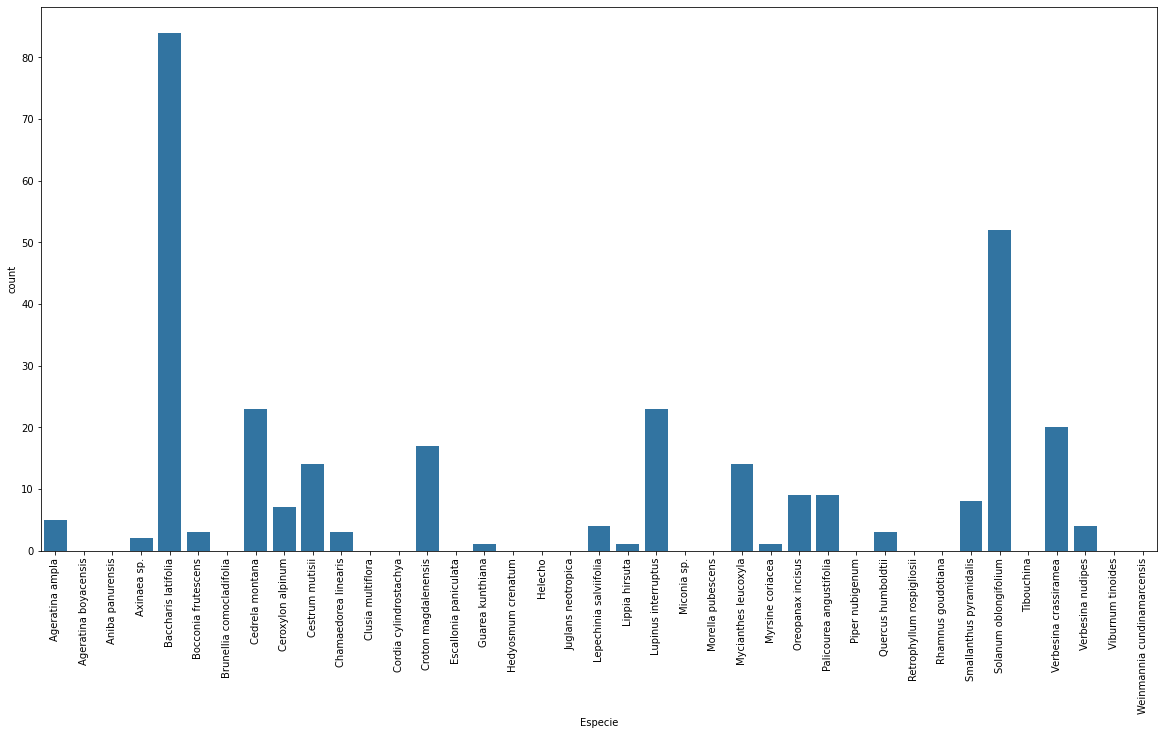

In [31]:
#We know for a fact that there were a bunch of plants that were never planted in T1. Let's find that.

plt.figure(figsize=(20,10))
sns.countplot(data=unplanted1, x='Especie', order = species, color=base_color);
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=t1, y='Especie', order = species, color=base_color);

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=t2, y='Especie', order = species, color=base_color);

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=t3, y='Especie', order = species, color=base_color);